### Monthly provisional counts of deaths by age group and HHS region for select causes of death

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint

In [2]:
file= pd.read_csv("death_by_disease.csv")

In [3]:
death_cause= pd.DataFrame(file)
death_cause

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
death_updated=death_cause.drop(columns=['flag_allcause','flag_natcause','flag_sept','flag_neopl',
                                        'flag_diab','flag_alz','flag_inflpn','flag_clrd','flag_otherresp',
                                        'flag_nephr','flag_otherunk','flag_hd','flag_stroke','flag_cov19mcod',
                                        'flag_cov19ucod'])
death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate,Note
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,27.0,NaN,217.0,34.0,NaN,0.0,0.0,4/23/2021,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,11.0,14.0,NaN,38.0,71.0,18.0,0.0,0.0,4/23/2021,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4/23/2021,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,55.0,18.0,NaN,70.0,171.0,37.0,42.0,35.0,4/23/2021,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021,NaN


In [5]:
death_updated[death_updated["Note"].str.contains("Data are provisional, and values in the most recent months are incomplete.")==False]
death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate,Note
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,27.0,NaN,217.0,34.0,NaN,0.0,0.0,4/23/2021,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,11.0,14.0,NaN,38.0,71.0,18.0,0.0,0.0,4/23/2021,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4/23/2021,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,55.0,18.0,NaN,70.0,171.0,37.0,42.0,35.0,4/23/2021,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021,NaN


In [6]:
death_updated["Note"].nunique()

1

In [7]:
del death_updated['Note']

In [8]:
US_death_total_2019=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]

In [9]:
US_death_total_2019=US_death_total_2019.loc[US_death_total_2019['Date Of Death Year'] == 2019]

In [10]:
US_death_total_2019.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,31.0,NaN,27.0,NaN,217.0,34.0,NaN,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,18.0,11.0,14.0,NaN,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021


In [11]:
US_death_total_2020=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]

In [12]:
US_death_total_2020=US_death_total_2020.loc[US_death_total_2020['Date Of Death Year'] == 2020]

In [13]:
US_death_total_2020.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate
120,2020,1,United States,0-4 years,2095.0,1876.0,23.0,33.0,0.0,0.0,57.0,NaN,22.0,NaN,239.0,39.0,14.0,0.0,0.0,4/23/2021
121,2020,1,United States,15-24 years,2595.0,648.0,11.0,114.0,29.0,0.0,40.0,10.0,12.0,NaN,41.0,84.0,12.0,0.0,0.0,4/23/2021
122,2020,1,United States,25-34 years,5215.0,1906.0,32.0,323.0,81.0,0.0,119.0,31.0,21.0,25.0,100.0,329.0,65.0,0.0,0.0,4/23/2021
123,2020,1,United States,35-44 years,7584.0,4363.0,86.0,930.0,254.0,0.0,197.0,70.0,55.0,59.0,88.0,973.0,171.0,0.0,0.0,4/23/2021
124,2020,1,United States,45-54 years,14421.0,11440.0,204.0,3039.0,591.0,NaN,360.0,302.0,137.0,200.0,181.0,2738.0,496.0,NaN,NaN,4/23/2021


In [14]:
US_death_total_2021=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]
US_death_total_2021=US_death_total_2021.loc[US_death_total_2021['Date Of Death Year'] == 2021]
US_death_total_2021.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate
240,2021,1,United States,0-4 years,1701.0,1554.0,17.0,31.0,0.0,0.0,NaN,NaN,18.0,NaN,307.0,17.0,10.0,10.0,NaN,4/23/2021
241,2021,1,United States,15-24 years,2915.0,954.0,NaN,101.0,22.0,0.0,NaN,11.0,12.0,NaN,369.0,76.0,11.0,122.0,99.0,4/23/2021
242,2021,1,United States,25-34 years,6425.0,3054.0,37.0,288.0,98.0,0.0,26.0,29.0,21.0,26.0,833.0,297.0,54.0,615.0,536.0,4/23/2021
243,2021,1,United States,35-44 years,9994.0,6999.0,78.0,906.0,276.0,NaN,86.0,62.0,59.0,86.0,1086.0,985.0,163.0,1556.0,1423.0,4/23/2021
244,2021,1,United States,45-54 years,19037.0,16368.0,206.0,2811.0,667.0,NaN,160.0,242.0,132.0,235.0,1091.0,2750.0,503.0,4531.0,4229.0,4/23/2021


In [15]:
HHS1_death_total=death_updated[death_updated["HHSRegion"].str.contains("1")==True]
HHS1_death_total = HHS1_death_total[HHS1_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS1_death_total=HHS1_death_total[["AgeGroup","COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"]]
#Add "Date Of Death Year", "Date Of Death Month" if you want to divide it up later above

HHS1_death_ages_grouped = HHS1_death_total.groupby(["AgeGroup"])
HHS1_death_ages_sum_multiple = HHS1_death_ages_grouped["COVID-19 (U071, Multiple Cause of Death)"].sum()

HHS1_death_ages_sum_underlying = HHS1_death_ages_grouped["COVID-19 (U071, Underlying Cause of Death)"].sum()

HHS1_death_ages_sum_m_and_u = HHS1_death_ages_sum_multiple + HHS1_death_ages_sum_underlying


HHS1_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS1_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS1_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS1_death_ages_sum_m_and_u
                              })
HHS1_death_total_ages_final
HHS1_death_total_df=HHS1_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS1_death_total_df

,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
AgeGroup,,,
0-4 years,0.0,0.0,0.0
15-24 years,0.0,0.0,0.0
25-34 years,35.0,32.0,67.0
35-44 years,181.0,150.0,331.0
45-54 years,649.0,578.0,1227.0
5-14 years,0.0,0.0,0.0
55-64 years,2125.0,1930.0,4055.0
65-74 years,4642.0,4259.0,8901.0
75-84 years,7357.0,6677.0,14034.0


In [16]:
HHS2_death_total=death_updated[death_updated["HHSRegion"].str.contains("2")==True]
HHS2_death_total = HHS2_death_total[HHS2_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS2_death_total=HHS2_death_total[["AgeGroup","COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"]]
#Add "Date Of Death Year", "Date Of Death Month" if you want to divide it up later above

HHS2_death_ages_grouped = HHS2_death_total.groupby(["AgeGroup"])
HHS2_death_ages_sum_multiple = HHS2_death_ages_grouped["COVID-19 (U071, Multiple Cause of Death)"].sum()

HHS2_death_ages_sum_underlying = HHS2_death_ages_grouped["COVID-19 (U071, Underlying Cause of Death)"].sum()

HHS2_death_ages_sum_m_and_u = HHS2_death_ages_sum_multiple + HHS2_death_ages_sum_underlying


HHS2_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS2_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS2_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS2_death_ages_sum_m_and_u
                              })
HHS2_death_total_ages_final
HHS2_death_total_df=HHS2_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS2_death_total_df

,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
AgeGroup,,,
0-4 years,0.0,0.0,0.0
15-24 years,51.0,46.0,97.0
25-34 years,387.0,358.0,745.0
35-44 years,1072.0,1005.0,2077.0
45-54 years,3022.0,2848.0,5870.0
5-14 years,0.0,0.0,0.0
55-64 years,7509.0,7009.0,14518.0
65-74 years,12081.0,11318.0,23399.0
75-84 years,14767.0,13681.0,28448.0


In [17]:
HHS3_death_total=death_updated[death_updated["HHSRegion"].str.contains("3")==True]
HHS3_death_total = HHS3_death_total[HHS3_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS3_death_total=HHS3_death_total[["AgeGroup","COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"]]

HHS3_death_ages_grouped = HHS3_death_total.groupby(["AgeGroup"])
HHS3_death_ages_sum_multiple = HHS3_death_ages_grouped["COVID-19 (U071, Multiple Cause of Death)"].sum()

HHS3_death_ages_sum_underlying = HHS3_death_ages_grouped["COVID-19 (U071, Underlying Cause of Death)"].sum()

HHS3_death_ages_sum_m_and_u = HHS3_death_ages_sum_multiple + HHS3_death_ages_sum_underlying


HHS3_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS3_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS3_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS3_death_ages_sum_m_and_u
                              })
HHS3_death_total_ages_final
HHS3_death_total_df=HHS3_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS3_death_total_df

,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
AgeGroup,,,
0-4 years,0.0,0.0,0.0
15-24 years,0.0,0.0,0.0
25-34 years,137.0,114.0,251.0
35-44 years,384.0,345.0,729.0
45-54 years,1222.0,1128.0,2350.0
5-14 years,0.0,0.0,0.0
55-64 years,3358.0,3092.0,6450.0
65-74 years,6753.0,6273.0,13026.0
75-84 years,9607.0,8788.0,18395.0


In [19]:
HHS4_death_total=death_updated[death_updated["HHSRegion"].str.contains("4")==True]
HHS4_death_total = HHS4_death_total[HHS4_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS4_death_total=HHS4_death_total[["AgeGroup","COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"]]

HHS4_death_ages_grouped = HHS4_death_total.groupby(["AgeGroup"])
HHS4_death_ages_sum_multiple = HHS4_death_ages_grouped["COVID-19 (U071, Multiple Cause of Death)"].sum()

HHS4_death_ages_sum_underlying = HHS4_death_ages_grouped["COVID-19 (U071, Underlying Cause of Death)"].sum()

HHS4_death_ages_sum_m_and_u = HHS4_death_ages_sum_multiple + HHS4_death_ages_sum_underlying


HHS4_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS4_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS4_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS4_death_ages_sum_m_and_u
                              })
HHS4_death_total_ages_final

,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
AgeGroup,,,
0-4 years,0.0,0.0,0.0
15-24 years,87.0,64.0,151.0
25-34 years,454.0,411.0,865.0
35-44 years,1220.0,1099.0,2319.0
45-54 years,3262.0,2979.0,6241.0
5-14 years,0.0,0.0,0.0
55-64 years,8607.0,7894.0,16501.0
65-74 years,16286.0,15074.0,31360.0
75-84 years,20498.0,18690.0,39188.0


In [ ]:
#Repeat that process for all 11.... if there's an easier way I'm all ears, I tried a loop but failed

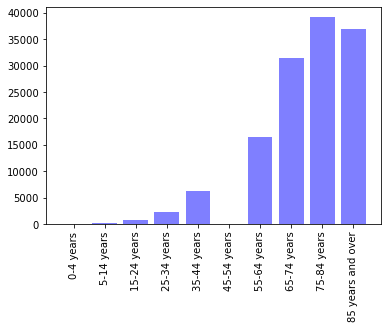

In [21]:
x_axis = np.arange(len(HHS4_death_total_ages_final))
y_axis=HHS4_death_total_ages_final["Total COVID-19 Deaths"]
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["0-4 years", "5-14 years","15-24 years", "25-34 years", "35-44 years", "45-54 years","55-64 years","65-74 years","75-84 years","85 years and over"], rotation="vertical")
plt.show()

#basic idea.... but i still need to fix the 5-14 and 45-55 years mix up